In [1]:
import glob 
from monai.transforms import (Compose, LoadImaged, EnsureTyped, ScaleIntensityRanged, NormalizeIntensityd, Resized)
import torch
import numpy as np

In [17]:
loader = Compose(
    [
        LoadImaged(keys='image', image_only=True, ensure_channel_first=True),
        EnsureTyped(keys='image', device=None, track_meta=False),
        Resized(keys='image', spatial_size=[512, 512]),
        ScaleIntensityRanged(keys='image',
                             a_max=255.0, a_min=0., b_max=1, b_min=0, clip=True),
        # NormalizeIntensityd(keys='image', subtrahend=0.48833441563848673, divisor=0.24424955053273747),
    ]
)

In [18]:
data_path = ['/root/Competitions/Kaggle/CXR(Pneumonia)/data/chest_xray/train/PNEUMONIA/person526_bacteria_2221.jpeg',
'/root/Competitions/Kaggle/CXR(Pneumonia)/data/chest_xray/train/PNEUMONIA/person1751_bacteria_4592.jpeg',
'/root/Competitions/Kaggle/CXR(Pneumonia)/data/chest_xray/train/PNEUMONIA/person343_virus_704.jpeg',
'/root/Competitions/Kaggle/CXR(Pneumonia)/data/chest_xray/train/PNEUMONIA/person1240_bacteria_3196.jpeg',
'/root/Competitions/Kaggle/CXR(Pneumonia)/data/chest_xray/train/PNEUMONIA/person470_virus_966.jpeg']

In [19]:
from tqdm import tqdm
for path in tqdm(data_path):
    
    data = {'image':path}
    data = loader(data)
    
    x = data['image']

100%|██████████| 5/5 [00:00<00:00, 39.70it/s]


In [20]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

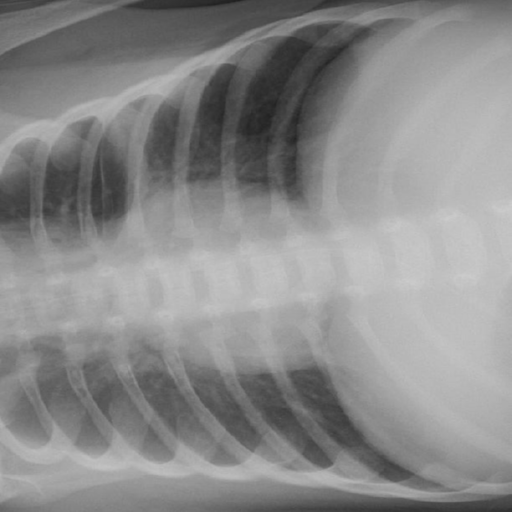

In [21]:
tf = T.ToPILImage()
img = tf(x)

img.show()

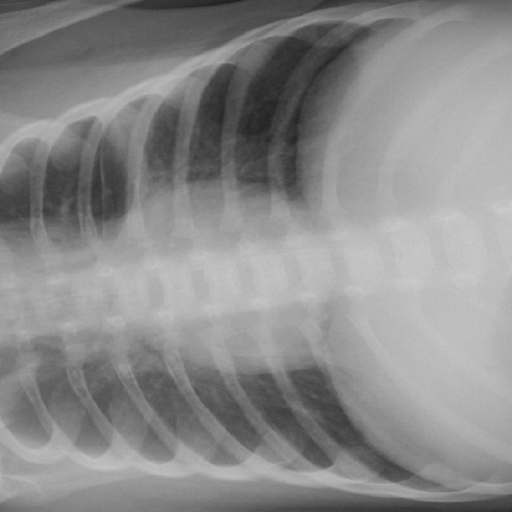

In [22]:
tf = T.ToPILImage()
img = tf(x[0])

img.show()